In [27]:
import tensorflow as tf
import numpy as np

In [5]:
X = tf.Variable([[0.4, 0.2, 0.4]])

W = tf.Variable([[-0.5, -0.2],
                 [-0.3,  0.4],
                 [-0.5,  0.2]])

b = tf.Variable([[0.1, 0.2]])

XWb = tf.matmul(X,W) + b
y = tf.nn.relu(XWb)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:'); print(sess.run(XWb))
    print('y:');   print(sess.run(y))

XWb:
[[-0.35999998  0.28      ]]
y:
[[0.   0.28]]


In [6]:
X = tf.Variable([[0.4, 0.2, 0.4]])

W = tf.Variable([[-0.5, -0.2],
                 [-0.3,  0.4],
                 [-0.5,  0.2]])

b = tf.Variable([[0.1, 0.2]])

XWb = tf.matmul(X,W) + b
y = tf.nn.sigmoid(XWb)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')
    print(sess.run(XWb))
    print('y:')
    print(sess.run(y))

XWb:
[[-0.35999998  0.28      ]]
y:
[[0.41095957 0.5695462 ]]


In [9]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))

XWb = tf.matmul(X,W) + b
y = tf.nn.relu(XWb)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('b:'); print(sess.run(b))
    print('W:'); print(sess.run(W))
    print('y:'); print(sess.run(y))

b:
[[-1.6107776  1.2792151]]
W:
[[ 1.6928875   1.0464482 ]
 [ 0.6647383   0.25211555]
 [-0.1522005   0.2852696 ]]
y:
[[0.        1.8623254]]


In [18]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))

XWb = tf.matmul(X,W) + b
y = tf.nn.relu(XWb)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    (_b, _W, _y) = sess.run((b, W, y))
    print('b:'); print(_b)
    print('W:'); print(_W)
    print('y:'); print(_y)

b:
[[ 0.3926433 -1.5605307]]
W:
[[-0.3007607   0.33960956]
 [-0.4758405   0.46838334]
 [-0.32711554 -0.49152502]]
y:
[[0.0463247 0.       ]]


In [19]:
ts_norm = tf.random_normal([1000])

with tf.Session() as sess:
    norm_data = ts_norm.eval()
print(norm_data[:5])

[-1.2769206  -1.220772    0.69739133 -0.3548067  -0.47721592]


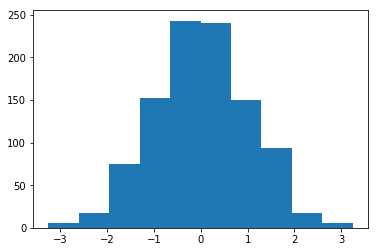

In [20]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

In [28]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))

X = tf.placeholder("float", [None, 3])

XWb = tf.matmul(X,W) + b
y = tf.nn.relu(XWb)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_ary = np.array([[0.4, 0.2, 0.4]])
    (_b, _W, _X, _y) = sess.run((b,W,X,y), feed_dict={X:X_ary})
    
    print('b:'); print(_b)
    print('W:'); print(_W)
    print('X:'); print(_X)
    print('y:'); print(_y)

b:
[[-2.8109574 -1.0096067]]
W:
[[-1.846255   3.8804002]
 [-0.985027  -0.9680935]
 [-1.8848157 -1.5056747]]
X:
[[0.4 0.2 0.4]]
y:
[[0. 0.]]


In [29]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None, 3])

y = tf.nn.sigmoid(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_ary = np.array([[0.4,  0.2, 0.4],
                      [0.3,  0.4, 0.5],
                      [0.3, -0.4, 0.5]])
    (_b, _W, _X, _y) = sess.run((b,W,X,y), feed_dict={X:X_ary})
    
    print('b:'); print(_b)
    print('W:'); print(_W)
    print('X:'); print(_X)
    print('y:'); print(_y)

b:
[[0.7949823  0.06267278]]
W:
[[-0.4488959   0.5131567 ]
 [ 0.68561244 -1.078967  ]
 [-1.3305454   0.4267944 ]]
X:
[[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y:
[[0.5548603  0.55548555]
 [0.5669176  0.4996075 ]
 [0.4306489  0.70299566]]


In [39]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    
    XWb = tf.matmul(inputs, W) + b
    
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [38]:
X = tf.placeholder("float", [None,4])
h = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_X, layer_h, layer_y) = sess.run((X,h,y), feed_dict={X:X_array})
    
    print('input  layer X:'); print(layer_X)
    print('hidden layer h:'); print(layer_h)
    print('output layer y:'); print(layer_y)

input  layer X:
[[0.4 0.2 0.4 0.5]]
hidden layer h:
[[0. 0. 0.]]
output layer y:
[[0.1022853  0.73476684]]


In [40]:
def layer_debug(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    
    XWb = tf.matmul(inputs, W) + b
    
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs, W, b

In [48]:
X = tf.placeholder("float", [None,4])
h, W1, b1 = layer_debug(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y, W2, b2 = layer_debug(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_X, layer_h, layer_y, W1, b1, W2, b2) = \
      sess.run((X,h,y,W1,b1,W2,b2), feed_dict={X:X_array})
    
    print('input layer X:'); print(layer_X)
    print('W1:'); print(W1)
    print('b1:'); print(b1)
    print('\nhidden layer h:'); print(layer_h)
    print('W2'); print(W2)
    print('b2'); print(b2)
    print('\noutput layer y:'); print(layer_y)

input layer X:
[[0.4 0.2 0.4 0.5]]
W1:
[[ 0.27653268 -0.42200932 -0.2140344 ]
 [-1.4634157  -0.1363069   0.74464214]
 [-0.2515128  -0.33848473 -0.7304316 ]
 [ 0.5161398  -0.21063884 -1.4346143 ]]
b1:
[[ 1.8385392  -1.0170711  -0.01781334]]

hidden layer h:
[[1.813934 0.       0.      ]]
W2
[[-0.29550964  0.6202708 ]
 [ 0.06516044  3.7358756 ]
 [ 0.36764905  0.03083463]]
b2
[[-0.01386163  0.79767567]]

output layer y:
[[-0.54989654  1.922806  ]]
